### MNIST Classifier

In this notebook, we will implement a CNN classifier to classify all the 10 digits the MNIST dataset. The objective of this lesson is twofold:
* To build our first CNN classifier.
* To use cross-entropy as classification loss.

Let's start with the ususal imports.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

# Normalization
x_train = x_train/255
x_test = x_test/255

# One-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Building the Classifier

We are going to build the same CNN classifier as before but note that we are using the softmax activation in the last layer (classification head).

In [11]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(num_classes, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,810 (50.04 KB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 0 (0.00 B)

#### Training

Let's now compile and train the model. We will use the cross-entropy loss for this task. And note that we can use the built-in accuracy metric for monitoring the training.

In [4]:
epochs = 25
batch_size = 128

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7739 - loss: 0.8187 - val_accuracy: 0.9695 - val_loss: 0.1118
Epoch 2/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9645 - loss: 0.1213 - val_accuracy: 0.9767 - val_loss: 0.0814
Epoch 3/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9736 - loss: 0.0863 - val_accuracy: 0.9797 - val_loss: 0.0725
Epoch 4/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9793 - loss: 0.0698 - val_accuracy: 0.9820 - val_loss: 0.0647
Epoch 5/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9821 - loss: 0.0595 - val_accuracy: 0.9842 - val_loss: 0.0564
Epoch 6/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9845 - loss: 0.0521 - val_accuracy: 0.9865 - val_loss: 0.0498
Epoch 7/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9860 - loss: 0.0464 - val_accuracy: 0.9880 - val_loss: 0.0466
Epoch 8/25
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.

Let's now plot the history to see the evolution of the training.

Train Acc      0.997259259223938
Validation Acc 0.9888333082199097


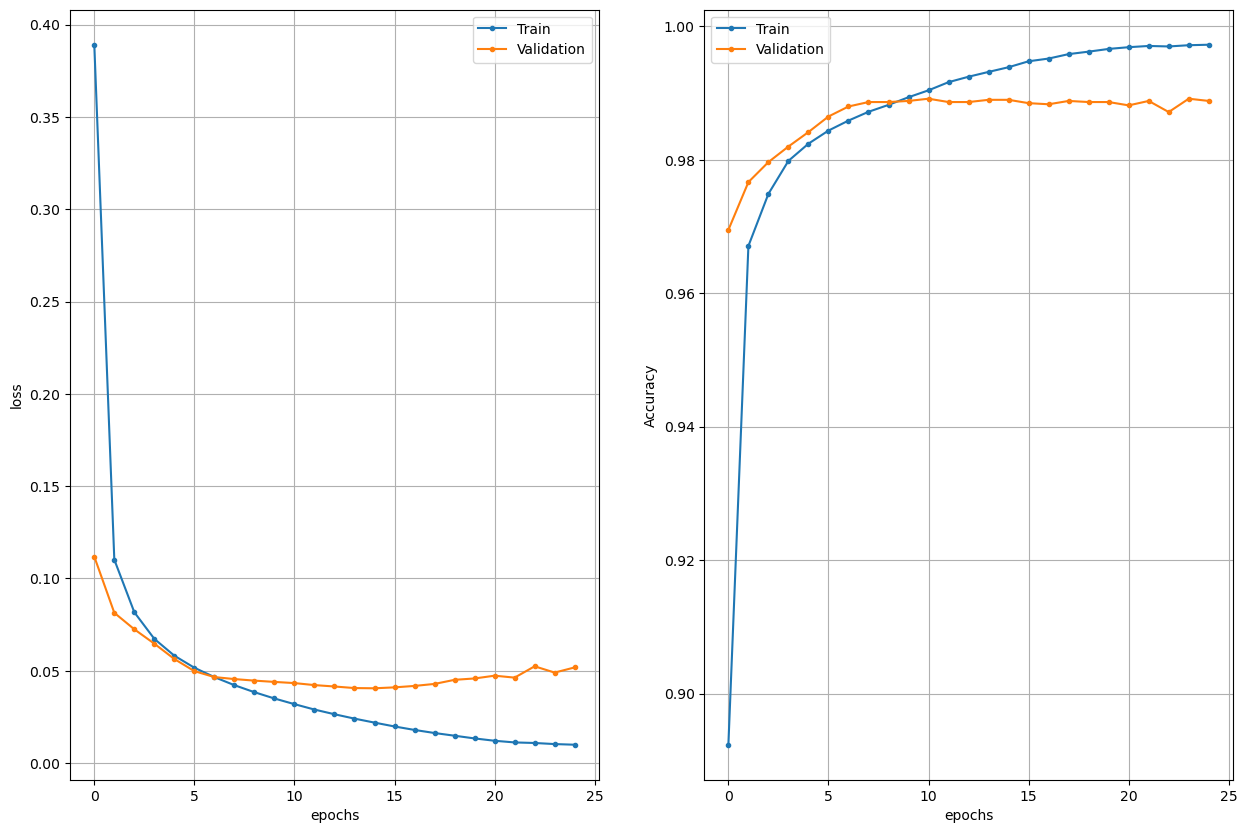

In [5]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

We have obtained an overall accuracy of about 99%. This might seem lower than we obtained using the binary classifier before but remember we are now classifying **all 10 digits**.

In [6]:
y_true = np.argmax(y_test, axis=1)
y_pred = model.predict(x_test)

print('True', y_true[0:5])
print('Pred', np.argmax(y_pred[0:5, :], axis=1))
print('Pred', y_pred[0:5, :])
print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
True [7 2 1 0 4]
Pred [7 2 1 0 4]
Pred [[5.83946540e-18 1.72622929e-13 4.42259632e-11 1.46226831e-09
  4.96606637e-20 1.60840373e-12 1.07291986e-25 1.00000000e+00
  2.89173088e-15 1.42270939e-09]
 [3.38113715e-08 1.31801361e-10 9.99996305e-01 1.74382156e-13
  8.21331567e-19 6.44506787e-16 3.52316010e-06 1.68121217e-17
  1.19814118e-07 5.25668266e-15]
 [1.26371413e-10 9.99746203e-01 4.40805614e-09 2.47379669e-11
  2.52967002e-04 7.23508364e-09 2.24815455e-08 4.15724458e-07
  3.80891834e-07 1.95939567e-11]
 [9.99999881e-01 1.46146059e-15 4.52206740e-13 5.04833920e-17
  7.21593670e-14 1.39002655e-11 8.54104911e-08 8.27244970e-14
  1.02525941e-12 1.33370886e-15]
 [6.86382296e-17 1.12272247e-12 9.43532785e-15 3.04915734e-13
  9.99999881e-01 8.55619320e-16 1.20012236e-13 5.81398197e-14
  3.58662492e-12 1.75486932e-07]]
(10000, 10)


In [7]:
digits = range(0, 10)
y_pred = np.argmax(y_pred, axis=1)

for digit in digits:
    mask = y_true == digit
    
    tp = np.sum(y_pred[mask] == digit)
    total = np.sum(mask)
    
    print('Digit-', digit, ' acc', tp/total)
    
print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.9887755102040816
Digit- 1  acc 0.9947136563876652
Digit- 2  acc 0.9738372093023255
Digit- 3  acc 0.9861386138613861
Digit- 4  acc 0.9979633401221996
Digit- 5  acc 0.9932735426008968
Digit- 6  acc 0.9853862212943633
Digit- 7  acc 0.995136186770428
Digit- 8  acc 0.9784394250513347
Digit- 9  acc 0.9682854311199207
y_true [9 9 9 ... 9 9 9]
y_pred [9 9 9 ... 9 9 9]


The trained model can also be quickly evaluated by calling the evaluate method on the test data. It will return the loss and the metric (or metrics).

In [8]:
ev = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0685


In [12]:
print('Test loss  ', ev[0])
print('Test metric', ev[1])

Test loss   0.0515814945101738
Test metric 0.9861999750137329


We now visualise some of the evaluation results.

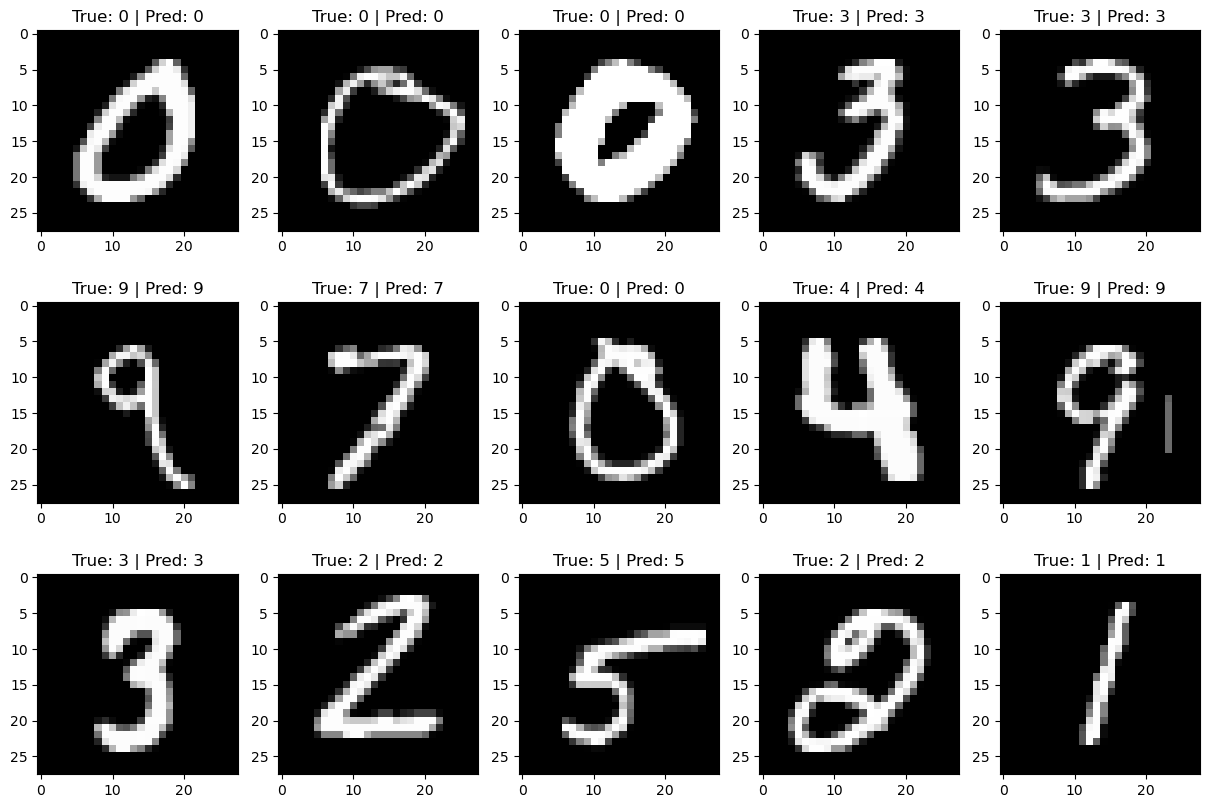

In [10]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(y_pred[idx]))